In [10]:
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
path = '/content/drive/Shared drives/650 final project/vege_image_classification'
os.chdir(path)
os.listdir(path)

Mounted at /content/drive


['vege_clf.ipynb',
 'cabbage',
 'bok choy',
 'lettuce',
 'green onions',
 'pepper',
 'broccoli',
 'spinach',
 'green peas',
 'asparagus',
 'cucumber',
 'celery',
 'zucchini',
 'tomato',
 'mushroom',
 'squash',
 'ginger',
 '.ipynb_checkpoints',
 'garlic',
 'eggplant',
 'oat',
 'carrot',
 'parsley',
 'XandZ.npz',
 'cnn_from_scratch_vege.hdf5',
 'scratchCNN_modelsave.h5',
 'vgg16_vege.hdf5',
 'vgg16_no_conv_tuning_modelsave.h5',
 'vgg16_vege_conv_tuning.hdf5',
 'vgg16_conv_tuning_last1conv_modelsave.h5',
 'vgg16_vege_conv_tuning_2.hdf5',
 'vgg16_conv_tuning_last2conv_modelsave.h5',
 'input image',
 'vege_clf_v1.ipynb',
 'input image prediction.ipynb']

In [ ]:
!pwd

/content/drive/Shared drives/650 final project/vege_image_classification


In [1]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# read the images
from google.colab.patches import cv2_imshow
import cv2                  
from tqdm import tqdm
import os 

#model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyClassifier

#preprocess
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras.models import Sequential, load_model
from keras.layers import Conv2D,MaxPooling2D,Activation, Dense, Flatten, Dropout
from keras.optimizers import Adam,SGD,RMSprop
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
import tensorflow as tf
from keras.applications.vgg16 import VGG16

# Read in the images

## Skip if the image array X and Z have been saved to np files

In [ ]:
vege = {
    'n07723559':'lettuce',
    'n07722485':'green onions',
    'n07714571':'cabbage',
    'n07720875':'pepper',
    'n07714990':'broccoli',
    'n07736692':'spinach',
    'n07725531':'green peas',
    'n07719213':'asparagus',
    'n07718472':'cucumber',
    'n07714448':'bok choy',
    'n07730406':'celery',
    'n07814925':'ginger',
    'n07818422':'garlic',
    'n07716358':'zucchini',
    'n07734292':'tomato',
    'n13001930':'mushroom',
    'n07713074':'eggplant',
    'n07804152':'oat',
    'n07730207':'carrot',
    'n07716906':'squash',
    'n07819896':'parsley'

}

In [ ]:
# extract images from tar
# skip if extraction has been done

# !mkdir 'cabbage'
# !tar -xvf  'n07714571.tar' -C 'cabbage'
# !mkdir 'bok choy'
# !tar -xvf  'n07714448.tar' -C 'bok choy'
# !mkdir 'lettuce'
# !tar -xvf  'n07723559.tar' -C 'lettuce'
# !mkdir 'green onions'
# !tar -xvf  'n07722485.tar' -C 'green onions'
# !mkdir 'pepper'
# !tar -xvf  'n07720875.tar' -C 'pepper'
# !mkdir 'broccoli'
# !tar -xvf  'n07714990.tar' -C 'broccoli'
# !mkdir 'spinach'
# !tar -xvf  'n07736692.tar' -C 'spinach'
# !mkdir 'green peas'
# !tar -xvf  'n07725531.tar' -C 'green peas'
# !mkdir 'asparagus'
# !tar -xvf  'n07719213.tar' -C 'asparagus'
# !mkdir 'cucumber'
# !tar -xvf  'n07718472.tar' -C 'cucumber'

# !mkdir 'celery'
# !tar -xvf  'n07730406.tar' -C 'celery'

# !unzip 'n07814925.zip'
# !move n07814925 ginger

# !unzip 'n07818422.zip'
# !mv n07818422 garlic

# !mkdir 'zucchini'
# !tar -xvf  'n07716358.tar' -C 'zucchini'

# !mkdir 'tomato'
# !tar -xvf  'n07734292.tar' -C 'tomato'

# !mkdir 'mushroom'
# !tar -xvf  'n13001930.tar' -C 'mushroom'

# !unzip 'n07713074.zip'
# !mv n07713074 eggplant

# !unzip 'n07804152.zip'
# !mv n07804152 oat

# !unzip 'n07730207.zip'
# !mv n07730207 carrot

# !mkdir 'squash'
# !tar -xvf  'n07716906.tar' -C 'squash'

# !unzip 'n07819896.zip'
# !mv n07819896 parsley


In [ ]:
# ref:
# https://www.kaggle.com/rajmehra03/a-comprehensive-guide-to-transfer-learning  main
# https://www.kaggle.com/shivamb/cnn-architectures-vgg-resnet-inception-tl
# https://www.kaggle.com/gaborfodor/dog-breed-pretrained-keras-models-lb-0-3 #least

In [ ]:
def add_label_to_image(vege_type,DIR,IMG_SIZE=64):
  for img in tqdm(os.listdir(DIR)):
    try:
      label = vege_type
      path = os.path.join(DIR,img)
      img = cv2.imread(path,cv2.IMREAD_COLOR)
      # cv2_imshow(img)
      # print('Original Dimensions : ',img.shape)
      img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))  # resize the image
      # cv2_imshow(img)  # show the resized image
      # print('Resized Dimensions : ',img.shape)
      
      X.append(np.array(img))
      Z.append(str(label))

    except Exception as e:  # in case there is broken image
      print(str(e))

print(len(os.listdir('asparagus')))  # the number of images in asparagus folder

1661


In [ ]:
X=[]
Z=[]
# import images and save as lists
for value in list(vege.values()):
  print(value)
  add_label_to_image(vege_type=value,DIR=value)

X = np.array(X)  # convert X from list to np.array
X = X.astype('float32')/255  # normalized the data to 0-1

Z = np.array(Z)  # convert the label from list to np.array

# save X Z np array
np.savez("XandZ.npz", X, Z)  # multiple  files

df = pd.DataFrame({'iamge':X,'label':Z})
df.groupby('label').count()

lettuce


  0%|          | 0/1165 [00:00<?, ?it/s]

green onions


  0%|          | 0/934 [00:00<?, ?it/s]

cabbage


  0%|          | 0/1378 [00:00<?, ?it/s]

pepper


  0%|          | 0/1224 [00:00<?, ?it/s]

broccoli


  0%|          | 0/1108 [00:00<?, ?it/s]

spinach


  0%|          | 0/1296 [00:00<?, ?it/s]

green peas


  0%|          | 0/1661 [00:00<?, ?it/s]

asparagus


 60%|██████    | 1000/1661 [15:43<10:19,  1.07it/s]

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



  0%|          | 0/1268 [00:00<?, ?it/s]

cucumber


  0%|          | 0/1026 [00:00<?, ?it/s]

bok choy


 97%|█████████▋| 1000/1026 [15:11<00:21,  1.22it/s]

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



  0%|          | 0/1020 [00:00<?, ?it/s]

celery


  0%|          | 0/66 [00:00<?, ?it/s]

ginger


  2%|▏         | 1/66 [00:00<00:33,  1.97it/s]

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



  0%|          | 0/163 [00:00<?, ?it/s]

garlic


  0%|          | 0/1093 [00:00<?, ?it/s]

zucchini


  0%|          | 0/1405 [00:00<?, ?it/s]

tomato


  0%|          | 0/1100 [00:00<?, ?it/s]

mushroom


  0%|          | 0/495 [00:00<?, ?it/s]

eggplant


  0%|          | 0/104 [00:00<?, ?it/s]

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

oat


  0%|          | 0/762 [00:00<?, ?it/s]

carrot


  0%|          | 0/758 [00:00<?, ?it/s]

squash


  0%|          | 0/490 [00:00<?, ?it/s]

parsley


100%|██████████| 490/490 [06:40<00:00,  1.22it/s]


## Execute this step if images np array have been saved - read in the np files 

In [11]:
# read in the images in np array
r = np.load("XandZ.npz") 
print(r.files) 
X = r["arr_0"] 
Z = r["arr_1"]

['arr_0', 'arr_1']


In [12]:
# onehotencode the categorical labels
ohe = OneHotEncoder()
ohe.fit(Z.reshape(-1,1))
label_array = ohe.categories_[0]  # the list of labels (text) 
Y = ohe.transform(Z.reshape(-1,1)).toarray()  # the labels as numerical variables

label_array[np.argmax(Y[0])] # transform the numerical label to categorical label

'lettuce'

In [13]:
X[1]

array([[[0.98039216, 0.89411765, 0.8666667 ],
        [0.6745098 , 0.5647059 , 0.5372549 ],
        [0.62352943, 0.5137255 , 0.4862745 ],
        ...,
        [0.6745098 , 0.12941177, 0.01960784],
        [0.62352943, 0.31764707, 0.27058825],
        [0.94509804, 0.95686275, 0.99215686]],

       [[0.827451  , 0.7019608 , 0.6784314 ],
        [0.7490196 , 0.627451  , 0.6039216 ],
        [0.5176471 , 0.3882353 , 0.3647059 ],
        ...,
        [0.6862745 , 0.12941177, 0.00392157],
        [0.627451  , 0.2784314 , 0.21960784],
        [0.8862745 , 0.8666667 , 0.8862745 ]],

       [[0.81960785, 0.7137255 , 0.6862745 ],
        [0.6156863 , 0.5137255 , 0.48235294],
        [0.5803922 , 0.47058824, 0.44313726],
        ...,
        [0.6627451 , 0.13725491, 0.00392157],
        [0.57254905, 0.24313726, 0.16078432],
        [0.7764706 , 0.7764706 , 0.77254903]],

       ...,

       [[0.15294118, 0.2       , 0.30980393],
        [0.15686275, 0.20392157, 0.30980393],
        [0.15294118, 0

In [14]:
# splitting into train and test sets
X_train_val,X_test,y_train_val,y_test = train_test_split(X,Y,test_size = 0.1, random_state=0)

# splitting the train set into train and validation sets
X_train,X_val,y_train,y_val = train_test_split(X_train_val,y_train_val,test_size = 0.2, random_state=0)

In [15]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(14308, 64, 64, 3) (3577, 64, 64, 3) (1988, 64, 64, 3) (14308, 21) (3577, 21) (1988, 21)


In [16]:
# data augmentation to prevent overfitting
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=40,  # randomly rotate images in the range (degrees, 0 to 180)
        shear_range=0.2,
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

# Dummy classifier

In [17]:
# dummy classifier
dummyclf = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
predictions = dummyclf.predict(X_val)

# asparagus is the most frequent item
most_frequent_label = dummyclf.predict(X_val[1])
count = 0
for i in y_val:
  if np.argmax(i) == np.argmax(most_frequent_label):
    count += 1
accuracy_score = count/y_val.shape[0]

print('val accuracy:',accuracy_score)  # of validation dataset

count = 0
for i in y_test:
  if np.argmax(i) == np.argmax(most_frequent_label):
    count += 1
accuracy_score_test = count/y_test.shape[0]
print('test accuracy:',accuracy_score_test)  # of test dataset

val accuracy: 0.08051439753983786
test accuracy: 0.08148893360160966


# Build CNN from scratch - simple CNN model

In [18]:
#Simple CNN from scratch - we are using 3 Conv layers followed by maxpooling layers.
# At the end we add dropout, flatten and some fully connected layers(Dense).

try:
  model1 = load_model('scratchCNN_modelsave.h5')
except:
  model1 = Sequential()
  model1.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(64,64,3),padding='same'))  # change the input_shape
  model1.add(Activation('relu'))
  model1.add(MaxPooling2D(pool_size=2))

  model1.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
  model1.add(MaxPooling2D(pool_size=2))

  model1.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
  model1.add(MaxPooling2D(pool_size=2))

  model1.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
  model1.add(MaxPooling2D(pool_size=2))

  model1.add(Dropout(0.3))
  model1.add(Flatten())
  model1.add(Dense(150))
  model1.add(Activation('relu'))
  model1.add(Dropout(0.4))
  model1.add(Dense(21,activation = 'softmax'))  ############################ change the output dimension accordingly

  model1.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['accuracy'])
  print('Compiled!')

model1.summary()

Compiled!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        208       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64) 

In [19]:
checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_vege.hdf5', verbose = 1, save_best_only = True)

history_1 = model1.fit(datagen.flow(X_train,y_train,batch_size = 32),
        steps_per_epoch = X_train.shape[0]//32,  # batch_size
        epochs=30,
        validation_data=(X_val, y_val),
        callbacks = [checkpointer],
        verbose=2, 
        shuffle=True)

Epoch 1/30

Epoch 00001: val_loss improved from inf to 2.76096, saving model to cnn_from_scratch_vege.hdf5
447/447 - 52s - loss: 2.9175 - accuracy: 0.0890 - val_loss: 2.7610 - val_accuracy: 0.1297
Epoch 2/30

Epoch 00002: val_loss improved from 2.76096 to 2.56882, saving model to cnn_from_scratch_vege.hdf5
447/447 - 53s - loss: 2.7017 - accuracy: 0.1431 - val_loss: 2.5688 - val_accuracy: 0.1918
Epoch 3/30

Epoch 00003: val_loss improved from 2.56882 to 2.49247, saving model to cnn_from_scratch_vege.hdf5
447/447 - 53s - loss: 2.6110 - accuracy: 0.1713 - val_loss: 2.4925 - val_accuracy: 0.2100
Epoch 4/30

Epoch 00004: val_loss improved from 2.49247 to 2.42164, saving model to cnn_from_scratch_vege.hdf5
447/447 - 53s - loss: 2.5473 - accuracy: 0.1886 - val_loss: 2.4216 - val_accuracy: 0.2368
Epoch 5/30

Epoch 00005: val_loss improved from 2.42164 to 2.38336, saving model to cnn_from_scratch_vege.hdf5
447/447 - 53s - loss: 2.4978 - accuracy: 0.2076 - val_loss: 2.3834 - val_accuracy: 0.2443

In [20]:
# save model1
model1.save('scratchCNN_modelsave.h5')

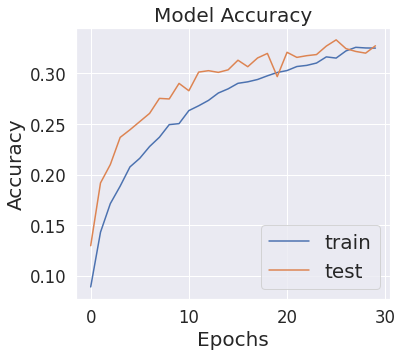

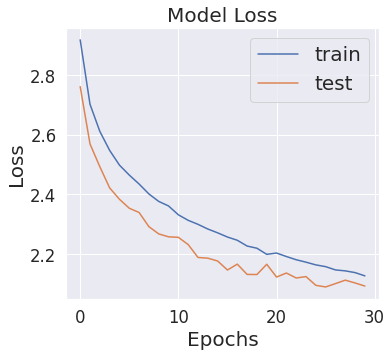

In [21]:
# visualize the accuracy and loss between epoches
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.legend(['train', 'test'],fontsize=20)
plt.show()

plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.legend(['train', 'test'],fontsize=20)
plt.show()

In [22]:
# load the weights that yielded the best validation accuracy
model1.load_weights('cnn_from_scratch_vege.hdf5')

# evaluate and print test accuracy
score = model1.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.324949711561203


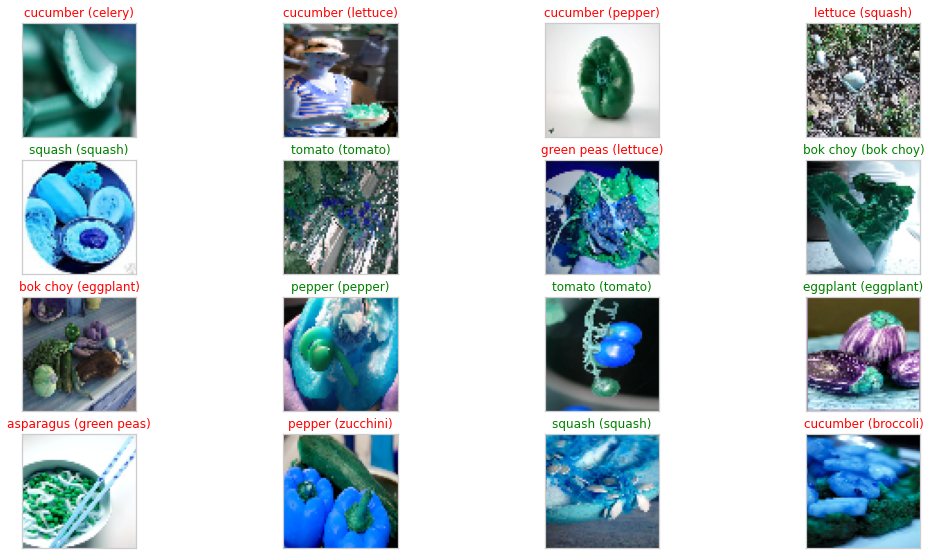

In [ ]:
# # Let's visualize test prediction.
# y_pred = model1.predict(X_test)

# # plot a random sample of test images, their predicted labels, and ground truth
# fig = plt.figure(figsize=(16, 9))
# for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
#     ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
#     ax.imshow(np.squeeze(X_test[idx]))
#     pred_idx = np.argmax(y_pred[idx])
#     true_idx = np.argmax(y_test[idx])
#     ax.set_title("{} ({})".format(label_array[pred_idx], label_array[true_idx]),
#                  color=("green" if pred_idx == true_idx else "red"))

# VGG16 - no conv layers tuning

In [ ]:
vgg16_model = VGG16(weights='imagenet',input_shape=(64,64,3), pooling='max', include_top=False)
vgg16_model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
______________________________________________________________

In [ ]:
# load the model
try:
  model = load_model('vgg16_no_conv_tuning_modelsave.h5')
except:
  # Because the include_top is False, we need to add our own full connect layers
  vgg16_model = VGG16(weights='imagenet',input_shape=(64,64,3), pooling='max', include_top=False)
  model=Sequential()
  model.add(vgg16_model) # the last layer is like flatten layer?

  model.add(Dense(256,activation='relu'))
  model.add(Dense(21,activation='softmax'))

  # compile the model
  vgg16_model.trainable=False # setting the VGG model to be untrainable. just use the pretained weights

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-3),
                metrics=['accuracy'])
  
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 21)                5397      
Total params: 14,851,413
Trainable params: 136,725
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
checkpointer = ModelCheckpoint(filepath = 'vgg16_vege.hdf5', verbose = 1, save_best_only = True)  
history_2 = model.fit(datagen.flow(X_train,y_train,batch_size = 32),
        steps_per_epoch = X_train.shape[0]//32,  # batch_size
        epochs=30,
        validation_data=(X_val, y_val),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Epoch 1/30

Epoch 00001: val_loss improved from inf to 2.12333, saving model to vgg16_vege.hdf5
447/447 - 744s - loss: 2.3442 - accuracy: 0.2743 - val_loss: 2.1233 - val_accuracy: 0.3436
Epoch 2/30

Epoch 00002: val_loss improved from 2.12333 to 2.06004, saving model to vgg16_vege.hdf5
447/447 - 745s - loss: 2.0983 - accuracy: 0.3431 - val_loss: 2.0600 - val_accuracy: 0.3553
Epoch 3/30

Epoch 00003: val_loss improved from 2.06004 to 2.00531, saving model to vgg16_vege.hdf5
447/447 - 748s - loss: 2.0177 - accuracy: 0.3696 - val_loss: 2.0053 - val_accuracy: 0.3727
Epoch 4/30

Epoch 00004: val_loss improved from 2.00531 to 1.97071, saving model to vgg16_vege.hdf5
447/447 - 754s - loss: 1.9643 - accuracy: 0.3868 - val_loss: 1.9707 - val_accuracy: 0.3917
Epoch 5/30

Epoch 00005: val_loss did not improve from 1.97071
447/447 - 747s - loss: 1.9465 - accuracy: 0.3906 - val_loss: 1.9849 - val_accuracy: 0.3774
Epoch 6/30

Epoch 00006: val_loss did not improve from 1.97071
447/447 - 745s - loss: 

In [ ]:
# Save a model you have trained 
model.save('vgg16_no_conv_tuning_modelsave.h5') 

# load the weights that yielded the best validation accuracy
model.load_weights('vgg16_vege.hdf5')

# evaluate and print test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.4356136918067932


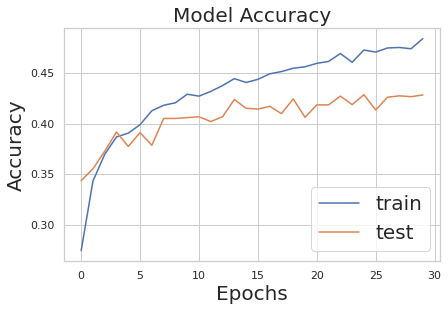

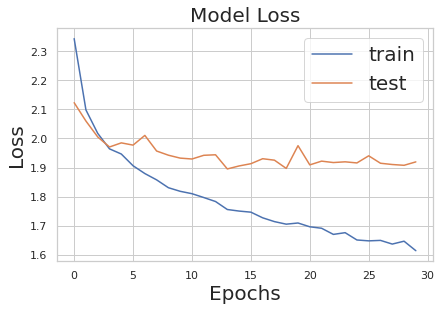

In [ ]:
# visualize the accuracy and loss between epoches
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.legend(['train', 'test'],fontsize=20)
plt.show()

plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.legend(['train', 'test'],fontsize=20)
plt.show()

# VGG16  + last 1 conv layer tuning

In [ ]:
# load model
try:
  model = load_model('vgg16_conv_tuning_last1conv_modelsave.h5')

except: # first time traing
  model=Sequential()
  model.add(vgg16_model) # the last layer is like flatten layer?

  model.add(Dense(256,activation='relu'))
  model.add(Dense(21,activation='softmax'))

  vgg16_model.trainable = True
  set_trainable = False
  for layer in vgg16_model.layers:
      if layer.name == 'block5_conv1':
          set_trainable = True
      if set_trainable:
          layer.trainable = True
      else:
          layer.trainable = False

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4),
                metrics=['accuracy'])
  print("compiled!")

model.summary()

compiled!
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 21)                5397      
Total params: 14,851,413
Trainable params: 7,216,149
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
checkpointer = ModelCheckpoint(filepath = 'vgg16_vege_conv_tuning.hdf5', verbose = 1, save_best_only = True)  
history_3 = model.fit(datagen.flow(X_train,y_train,batch_size = 32),
        steps_per_epoch = X_train.shape[0]//32,  # batch_size
        epochs=30,
        validation_data=(X_val, y_val),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Epoch 1/30

Epoch 00001: val_loss improved from inf to 1.83480, saving model to vgg16_vege_conv_tuning.hdf5
447/447 - 979s - loss: 2.1518 - accuracy: 0.3363 - val_loss: 1.8348 - val_accuracy: 0.4241
Epoch 2/30

Epoch 00002: val_loss improved from 1.83480 to 1.72313, saving model to vgg16_vege_conv_tuning.hdf5
447/447 - 978s - loss: 1.7809 - accuracy: 0.4383 - val_loss: 1.7231 - val_accuracy: 0.4618
Epoch 3/30

Epoch 00003: val_loss improved from 1.72313 to 1.62389, saving model to vgg16_vege_conv_tuning.hdf5
447/447 - 977s - loss: 1.6548 - accuracy: 0.4745 - val_loss: 1.6239 - val_accuracy: 0.5001
Epoch 4/30

Epoch 00004: val_loss did not improve from 1.62389
447/447 - 974s - loss: 1.5512 - accuracy: 0.5039 - val_loss: 1.6555 - val_accuracy: 0.4878
Epoch 5/30

Epoch 00005: val_loss did not improve from 1.62389
447/447 - 974s - loss: 1.4510 - accuracy: 0.5335 - val_loss: 1.6412 - val_accuracy: 0.5096
Epoch 6/30

Epoch 00006: val_loss improved from 1.62389 to 1.55277, saving model to vgg

In [ ]:
model.save('vgg16_conv_tuning_last1conv_modelsave.h5') 

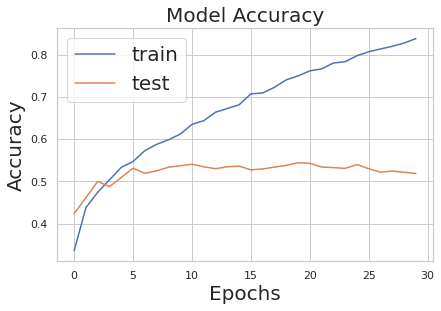

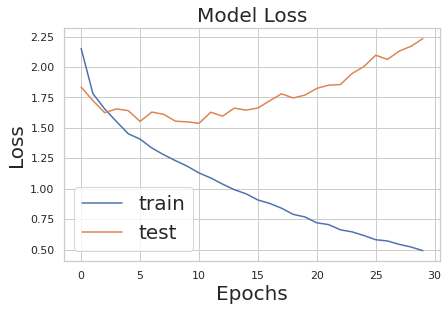


 Test accuracy: 0.5286720395088196


In [ ]:
# visualize the accuracy and loss between epoches
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.legend(['train', 'test'],fontsize=20)
plt.show()

plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model Loss',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.legend(['train', 'test'],fontsize=20)
plt.show()

# load the weights that yielded the best validation accuracy
model.load_weights('vgg16_vege_conv_tuning.hdf5')

# evaluate and print test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

# VGG16 + last 2 conv layers tuning

In [ ]:
# fine tuning by unfreezing the last two conv blocks of VGG16
try:
  model = load_model('vgg16_conv_tuning_last2conv_modelsave.h5')

except:
  model=Sequential()
  model.add(vgg16_model) # the last layer is like flatten layer?

  model.add(Dense(256,activation='relu'))
  model.add(Dense(21,activation='softmax'))

  vgg16_model.trainable = True
  set_trainable = False
  for layer in vgg16_model.layers:
      if layer.name == 'block4_conv1':
          set_trainable = True
      if set_trainable:
          layer.trainable = True
      else:
          layer.trainable = False

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4),
                metrics=['accuracy'])
  print('compiled!')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dense_1 (Dense)              (None, 21)                5397      
Total params: 14,851,413
Trainable params: 13,115,925
Non-trainable params: 1,735,488
_________________________________________________________________
None


In [ ]:
checkpointer = ModelCheckpoint(filepath = 'vgg16_vege_conv_tuning_2.hdf5', verbose = 1, save_best_only = True)  
history_4 = model.fit(datagen.flow(X_train,y_train,batch_size = 32),
        steps_per_epoch = X_train.shape[0]//32,  # batch_size
        epochs=25,
        validation_data=(X_val, y_val),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Epoch 1/25

Epoch 00001: val_loss improved from inf to 1.86669, saving model to vgg16_vege_conv_tuning_2.hdf5
447/447 - 1224s - loss: 2.2321 - accuracy: 0.2921 - val_loss: 1.8667 - val_accuracy: 0.4135
Epoch 2/25

Epoch 00002: val_loss improved from 1.86669 to 1.72561, saving model to vgg16_vege_conv_tuning_2.hdf5
447/447 - 1234s - loss: 1.8055 - accuracy: 0.4311 - val_loss: 1.7256 - val_accuracy: 0.4551
Epoch 3/25

Epoch 00003: val_loss improved from 1.72561 to 1.67437, saving model to vgg16_vege_conv_tuning_2.hdf5
447/447 - 1295s - loss: 1.6345 - accuracy: 0.4835 - val_loss: 1.6744 - val_accuracy: 0.4892
Epoch 4/25

Epoch 00004: val_loss improved from 1.67437 to 1.55549, saving model to vgg16_vege_conv_tuning_2.hdf5
447/447 - 1295s - loss: 1.5027 - accuracy: 0.5272 - val_loss: 1.5555 - val_accuracy: 0.5192
Epoch 5/25

Epoch 00005: val_loss improved from 1.55549 to 1.48765, saving model to vgg16_vege_conv_tuning_2.hdf5
447/447 - 1300s - loss: 1.4262 - accuracy: 0.5492 - val_loss: 1.48

In [ ]:
model.save('vgg16_conv_tuning_last2conv_modelsave.h5')

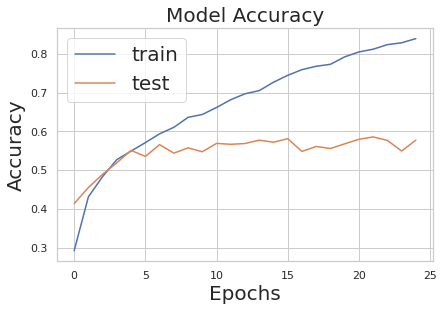

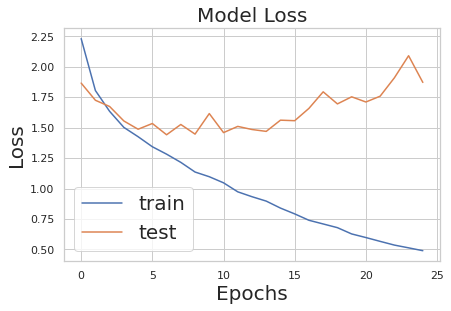


 Test accuracy: 0.5643863081932068


In [ ]:
# visualize the accuracy and loss between epoches
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.legend(['train', 'test'],fontsize=20)
plt.show()

plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Model Loss',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.legend(['train', 'test'],fontsize=20)
plt.show()

# load the weights that yielded the best validation accuracy
model.load_weights('vgg16_vege_conv_tuning_2.hdf5')

# evaluate and print test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

# Compare the models

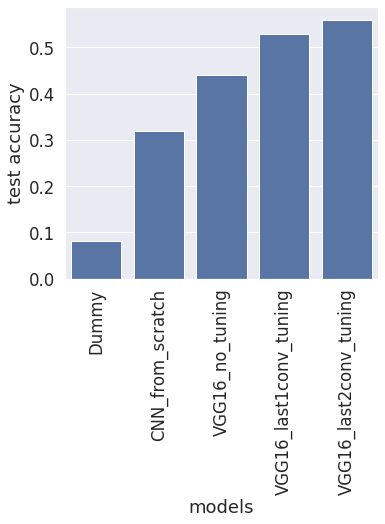

In [23]:
diff_models = pd.DataFrame({'models':['Dummy','CNN_from_scratch','VGG16_no_tuning','VGG16_last1conv_tuning','VGG16_last2conv_tuning'],
              'test accuracy':[0.081,0.32,0.44,0.53,0.56]})

sns.set(rc={'figure.figsize':(5,5)})
sns.set(font_scale = 1.5)
sns.barplot(x='models',y='test accuracy',data=diff_models.sort_values(by='test accuracy'),color='b')
plt.xticks(rotation=90)
plt.show()